In [2]:
import pandas as pd

# load the data
match_df = pd.read_csv('matches.csv')
delivery_df = pd.read_csv('deliveries.csv')

print("success! data loaded.")

success! data loaded.


In [3]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match_df.shape

(1095, 20)

In [5]:
# find top 10 players with most man of the match awards

match_df['player_of_match'].value_counts().head(10)


player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64

In [6]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
# group by batter and sum their runs to find the top 5

top_scorer = delivery_df.groupby('batter')['total_runs'].sum().sort_values(ascending=False).head(5)

print(top_scorer)

batter
V Kohli      8307
S Dhawan     7119
DA Warner    6910
RG Sharma    6884
SK Raina     5780
Name: total_runs, dtype: int64


<Axes: title={'center': 'top 5 Run scorers in ipl'}, xlabel='batter', ylabel='total runs'>

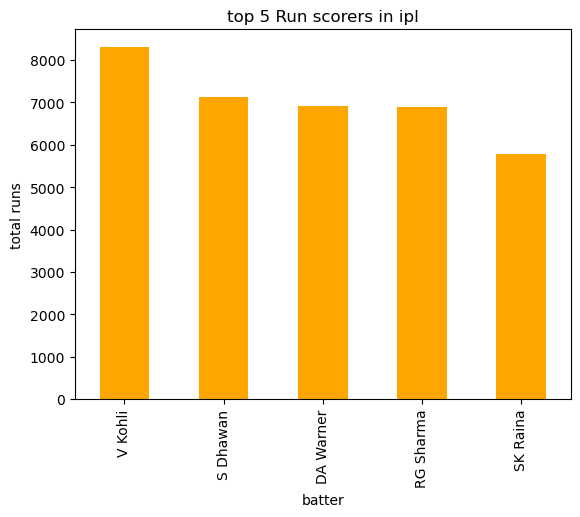

In [10]:
# plotting the top 5 scorers as a bar chart

top_scorer.plot(kind='bar' , title='top 5 Run scorers in ipl' , ylabel='total runs' ,color='orange')

In [16]:
# 1. Filter out run-outs (since they dont count for the bowlers)
# we only want rows where 'dismissal_kind' is not empty and NOT run-out

wicket_data = delivery_df[(delivery_df['dismissal_kind'].notna()) & (delivery_df['dismissal_kind'] != 'run out')]

# 2. Group by bowler and count the wickets

top_bowlers = wicket_data.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(5)
print(top_bowlers)

bowler
YS Chahal    205
PP Chawla    192
DJ Bravo     183
R Ashwin     181
B Kumar      181
Name: dismissal_kind, dtype: int64


<Axes: title={'center': 'top 5 wicket takers'}, xlabel='bowler', ylabel='wickets'>

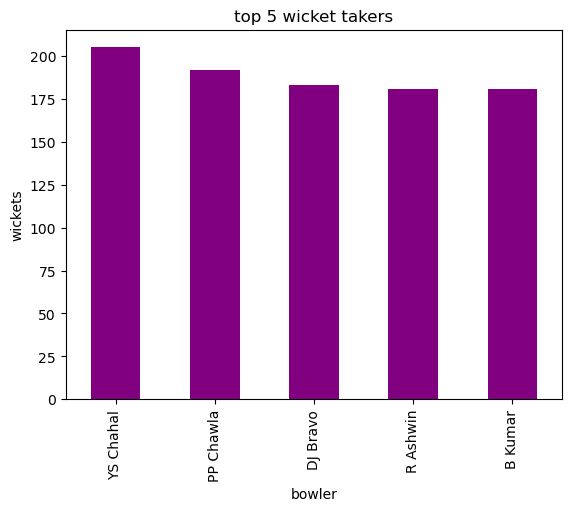

In [17]:
top_bowlers.plot(kind='bar' , title = 'top 5 wicket takers' , color = 'purple' , ylabel = 'wickets')

<Axes: title={'center': 'Toss Decision Percentage'}>

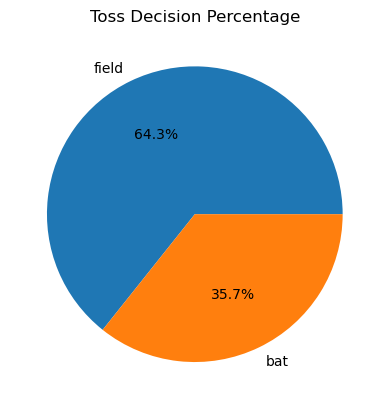

In [18]:
# 1. Load the matches data (just in case)
matches = pd.read_csv('matches.csv')

# 2. Count how many times teams chose 'field' vs 'bat'
toss_decision = matches['toss_decision'].value_counts()

# 3. Plot a Pie Chart
toss_decision.plot(kind='pie', autopct='%1.1f%%', title='Toss Decision Percentage', ylabel='')

<Axes: title={'center': 'Most Wins by Team'}, xlabel='Number of Wins', ylabel='winner'>

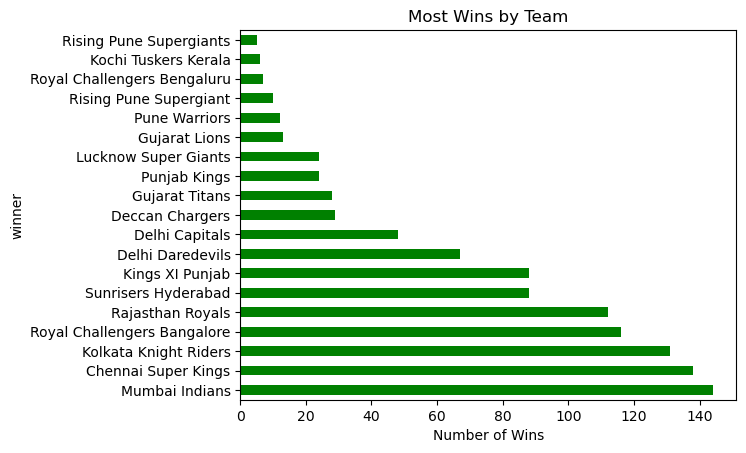

In [19]:
# Count wins per team and plot a horizontal bar chart
team_wins = matches['winner'].value_counts()

# 'barh' makes the bars horizontal
team_wins.plot(kind='barh', title='Most Wins by Team', color='green', xlabel='Number of Wins')

<Axes: title={'center': 'Does Winning Toss = Winning Match?'}, ylabel='count'>

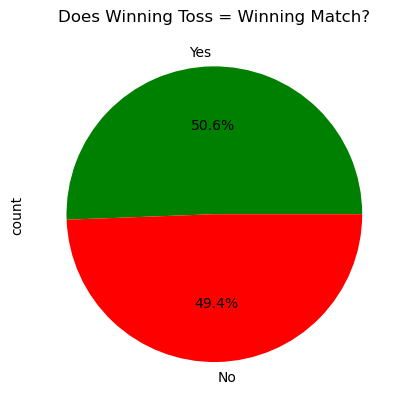

In [20]:
# Check if the toss winner is the same as the match winner
toss_vs_match = (matches['toss_winner'] == matches['winner']).value_counts()

# Plot the result
toss_vs_match.plot(kind='pie', autopct='%1.1f%%', title='Does Winning Toss = Winning Match?', labels=['Yes', 'No'], colors=['green', 'red'])

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


<Axes: title={'center': 'most man of the match awards'}, xlabel='player_of_match', ylabel='awards'>

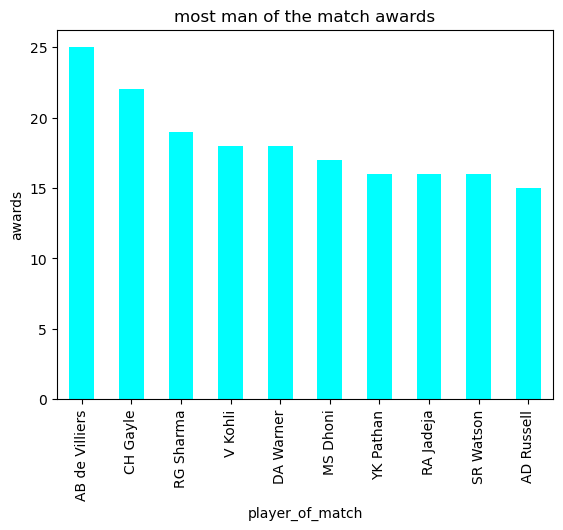

In [21]:
# find the top 10 players with the most man of the match awards 
top_players = matches['player_of_match'].value_counts().head(10)
print(top_players)

#plot it as a bar chart 
top_players.plot(kind = 'bar' , title  = 'most man of the match awards' , color = 'cyan' , ylabel = 'awards')